Here is a simpler example of the use of LIME for image classification by using Keras (v2 or greater)

In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/50.1 kB ? eta -:--:--
     ---------------------------------------- 50.1/50.1 kB 2.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.4/376.0 MB 13.5 MB/s eta 0:00:28
   ---------------------------------------- 0.6/376.0 MB 12.9 MB/s eta 0:00:30
   ---------------------------------------- 1.3/376.0 MB 10.4 MB/s eta 0:00:37
   ---------------------------------------- 1.6/376.0 MB 10.2 MB/s eta 0:00:37
   ---------------------------------------- 2.0/376.0 MB 8.9 MB/s eta 0:00:43
   ---------------------------------------- 2.4/376.0 MB 8.8 MB/s eta 0:00:43
   ---------------------------------------- 2.8/376.0 MB 8.9 MB/s eta 0:00:42
   ---------------------------------------- 3.1/376.0 MB 9.3 MB/s eta 0:00:41
   ---------------------------------------- 3.5/376.0 MB 8.6 MB/s eta 0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
pip install scikit-image


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: C:\Users\saadr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
pip install lime

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: C:\Users\saadr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

# Using Inception
Here we create a standard InceptionV3 pretrained model and use it on images by first preprocessing them with the preprocessing tools

In [2]:
inet_model = inc_net.InceptionV3()

In [3]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

## Let's see the top 5 prediction for some image

> Add blockquote



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
('n07579787', 'plate', 0.3384156)
('n07711569', 'mashed_potato', 0.33722165)
('n07715103', 'cauliflower', 0.0355067)
('n07871810', 'meat_loaf', 0.023066979)
('n03775546', 'mixing_bowl', 0.018651674)


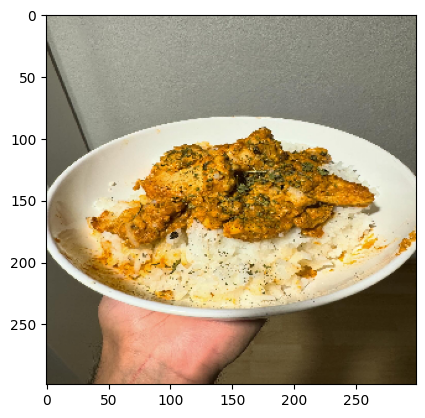

In [22]:
images = transform_img_fn([os.path.join('ID.jpg')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

## Explanation
Now let's get an explanation

In [7]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

C:\Users\saadr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
explainer = lime_image.LimeImageExplainer()

hide_color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels. Here, we set it to 0 (in the representation used by inception model, 0 means gray)

In [9]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  1%|          | 10/1000 [00:03<05:36,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


  2%|▏         | 20/1000 [00:04<02:58,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


  3%|▎         | 30/1000 [00:04<02:06,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


  4%|▍         | 40/1000 [00:05<01:42,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


  5%|▌         | 50/1000 [00:06<01:28, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


  6%|▌         | 60/1000 [00:06<01:20, 11.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


  7%|▋         | 70/1000 [00:07<01:14, 12.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


  8%|▊         | 80/1000 [00:08<01:09, 13.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


  9%|▉         | 90/1000 [00:08<01:06, 13.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


 10%|█         | 100/1000 [00:09<01:05, 13.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


 11%|█         | 110/1000 [00:10<01:10, 12.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


 12%|█▏        | 120/1000 [00:11<01:07, 13.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step


 14%|█▎        | 136/1000 [00:12<00:56, 15.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


 14%|█▍        | 140/1000 [00:12<01:13, 11.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


 15%|█▌        | 150/1000 [00:13<01:08, 12.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


 16%|█▌        | 160/1000 [00:14<01:05, 12.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


 17%|█▋        | 170/1000 [00:15<01:03, 13.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


 18%|█▊        | 180/1000 [00:15<01:01, 13.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


 19%|█▉        | 190/1000 [00:16<00:59, 13.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


 20%|██        | 200/1000 [00:17<00:58, 13.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


 21%|██        | 210/1000 [00:18<00:58, 13.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


 22%|██▏       | 220/1000 [00:18<00:56, 13.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


 23%|██▎       | 230/1000 [00:19<00:54, 14.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


 24%|██▍       | 240/1000 [00:20<00:53, 14.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


 25%|██▌       | 250/1000 [00:20<00:53, 14.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


 26%|██▌       | 260/1000 [00:21<00:52, 13.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


 27%|██▋       | 270/1000 [00:22<00:51, 14.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


 28%|██▊       | 280/1000 [00:22<00:50, 14.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


 29%|██▉       | 290/1000 [00:23<00:49, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


 30%|███       | 300/1000 [00:24<00:47, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


 31%|███       | 310/1000 [00:24<00:48, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


 32%|███▏      | 320/1000 [00:25<00:48, 13.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


 33%|███▎      | 330/1000 [00:26<00:47, 14.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


 34%|███▍      | 340/1000 [00:27<00:46, 14.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


 35%|███▌      | 350/1000 [00:27<00:44, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


 36%|███▌      | 360/1000 [00:28<00:45, 14.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


 37%|███▋      | 370/1000 [00:29<00:44, 14.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


 38%|███▊      | 380/1000 [00:29<00:43, 14.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


 39%|███▉      | 390/1000 [00:30<00:42, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


 40%|████      | 400/1000 [00:31<00:41, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


 41%|████      | 410/1000 [00:31<00:40, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


 42%|████▏     | 420/1000 [00:32<00:39, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


 43%|████▎     | 430/1000 [00:33<00:38, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


 44%|████▍     | 440/1000 [00:33<00:38, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


 45%|████▌     | 450/1000 [00:34<00:37, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


 46%|████▌     | 460/1000 [00:35<00:37, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


 47%|████▋     | 470/1000 [00:36<00:36, 14.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


 48%|████▊     | 480/1000 [00:36<00:35, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


 49%|████▉     | 490/1000 [00:37<00:35, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


 50%|█████     | 500/1000 [00:38<00:34, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


 51%|█████     | 510/1000 [00:38<00:33, 14.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


 52%|█████▏    | 520/1000 [00:39<00:33, 14.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


 53%|█████▎    | 530/1000 [00:40<00:32, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


 54%|█████▍    | 540/1000 [00:40<00:31, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


 55%|█████▌    | 550/1000 [00:41<00:31, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


 56%|█████▌    | 560/1000 [00:42<00:30, 14.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


 57%|█████▋    | 570/1000 [00:43<00:29, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


 58%|█████▊    | 580/1000 [00:43<00:28, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


 59%|█████▉    | 590/1000 [00:44<00:29, 14.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


 60%|██████    | 600/1000 [00:45<00:28, 14.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


 61%|██████    | 610/1000 [00:45<00:27, 14.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step


 62%|██████▏   | 620/1000 [00:46<00:27, 13.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


 63%|██████▎   | 630/1000 [00:47<00:26, 13.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


 64%|██████▍   | 640/1000 [00:48<00:25, 14.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


 65%|██████▌   | 650/1000 [00:48<00:25, 13.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step


 66%|██████▌   | 660/1000 [00:49<00:25, 13.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step


 67%|██████▋   | 670/1000 [00:50<00:25, 12.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


 68%|██████▊   | 680/1000 [00:51<00:24, 12.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


 69%|██████▉   | 690/1000 [00:51<00:23, 13.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


 70%|███████   | 700/1000 [00:52<00:23, 12.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step


 71%|███████   | 710/1000 [00:53<00:23, 12.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step


 72%|███████▏  | 720/1000 [00:54<00:23, 11.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


 73%|███████▎  | 730/1000 [00:55<00:21, 12.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


 74%|███████▍  | 740/1000 [00:55<00:20, 12.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


 75%|███████▌  | 750/1000 [00:56<00:19, 12.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


 76%|███████▌  | 760/1000 [00:57<00:18, 13.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


 77%|███████▋  | 770/1000 [00:58<00:17, 13.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step


 78%|███████▊  | 780/1000 [00:59<00:17, 12.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


 79%|███████▉  | 790/1000 [00:59<00:16, 12.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


 80%|████████  | 800/1000 [01:00<00:15, 13.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


 81%|████████  | 810/1000 [01:01<00:14, 12.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


 82%|████████▏ | 820/1000 [01:02<00:13, 12.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step


 83%|████████▎ | 830/1000 [01:02<00:13, 12.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


 84%|████████▍ | 840/1000 [01:03<00:12, 13.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


 85%|████████▌ | 850/1000 [01:04<00:11, 13.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


 86%|████████▌ | 860/1000 [01:05<00:10, 13.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


 87%|████████▋ | 870/1000 [01:05<00:09, 13.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


 88%|████████▊ | 880/1000 [01:06<00:08, 13.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


 89%|████████▉ | 890/1000 [01:07<00:07, 13.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


 90%|█████████ | 900/1000 [01:07<00:07, 13.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


 91%|█████████ | 910/1000 [01:08<00:06, 14.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


 92%|█████████▏| 920/1000 [01:09<00:05, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


 93%|█████████▎| 930/1000 [01:10<00:04, 14.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


 94%|█████████▍| 940/1000 [01:10<00:04, 14.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


 95%|█████████▌| 950/1000 [01:11<00:03, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


 96%|█████████▌| 960/1000 [01:12<00:02, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


 97%|█████████▋| 970/1000 [01:12<00:02, 14.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


 98%|█████████▊| 980/1000 [01:13<00:01, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


 99%|█████████▉| 990/1000 [01:14<00:00, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


100%|██████████| 1000/1000 [01:14<00:00, 13.39it/s]

CPU times: total: 2min 23s
Wall time: 1min 15s


Image classifiers are a bit slow. Notice that an explanation on my Surface Book dGPU took 1min 12s

### Now let's see the explanation for the top class ( Black Bear)

We can see the top 5 superpixels that are most positive towards the class with the rest of the image hidden

In [10]:
from skimage.segmentation import mark_boundaries

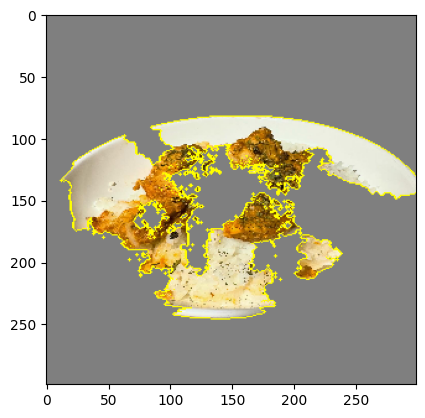

In [11]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Or with the rest of the image present:

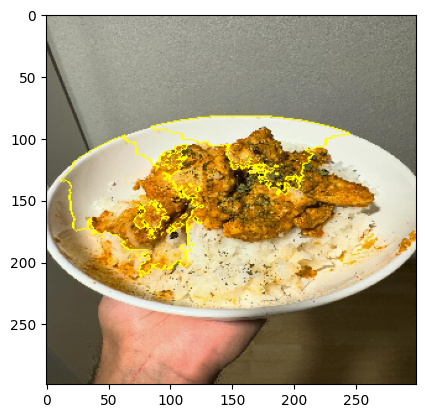

In [12]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


We can also see the 'pros and cons' (pros in green, cons in red)

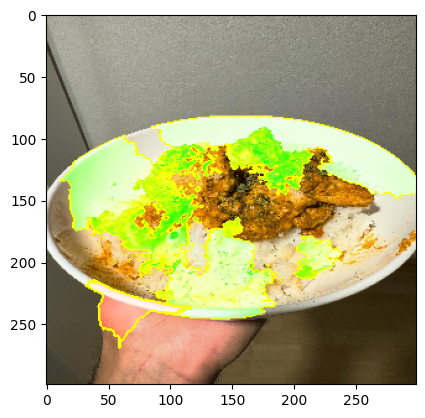

In [13]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Or the pros and cons that have weight at least 0.1

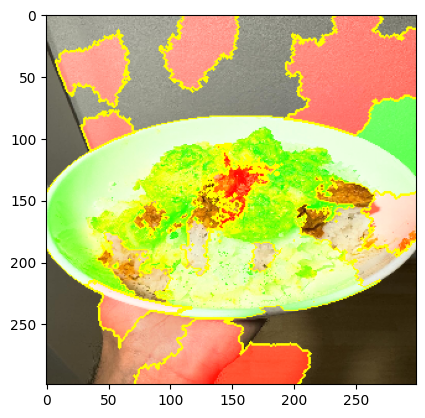

In [14]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.01)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Alternatively, we can also plot explanation weights onto a heatmap visualization. The colorbar shows the values of the weights.

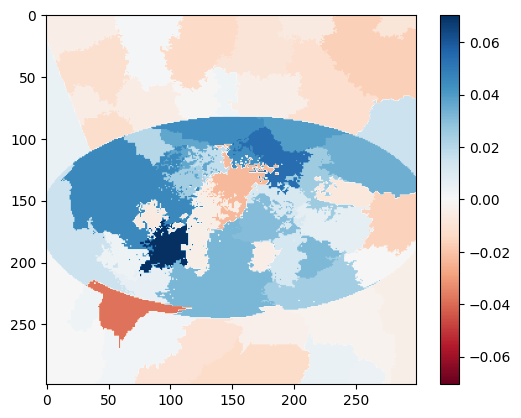

In [15]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

### Let's see the explanation for the second highest prediction

In [16]:
# Check the available labels in the explanation object
print(explanation.local_exp.keys())

# Choose a label that exists in the explanation object
label = list(explanation.local_exp.keys())[0] # Example: Select the first available label


dict_keys([659, 962, 938, 935, 923])


Most positive towards wombat:

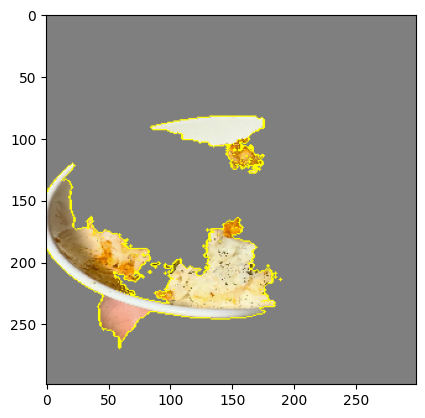

In [18]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Pros and cons:

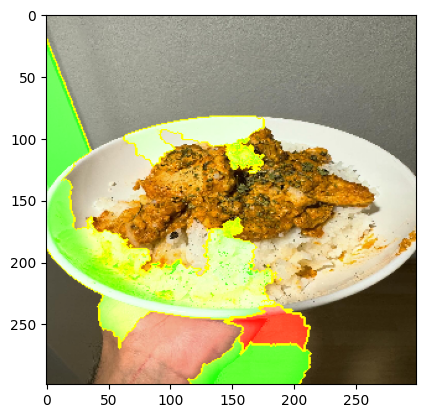

In [19]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


In [28]:
pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   - -------------------------------------- 1.8/38.8 MB 9.1 MB/s eta 0:00:05
   ----- ---------------------------------- 5.0/38.8 MB 12.6 MB/s eta 0:00:03
   -------- ------------------------------- 8.7/38.8 MB 14.1 MB/s eta 0:00:03
   ------------ --------------------------- 12.6/38.8 MB 15.2 MB/s eta 0:00:02
   --------------- ------------------------ 15.5/38.8 MB 14.7 MB/s eta 0:00:02
   ------------------------ --------------- 23.3/38.8 MB 18.5 MB/s eta 0:00:01
   ---------------------------------- ----- 33.0/38.8 MB 22.3 MB/s eta 0:00:01
   ---------------------------------------  38.8/38.8 MB 23.7 MB/s eta 0:00:01
   ---------------------------------------- 38.8/38.8 MB 22.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [30]:
model=inet_model

In [32]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

# Load pre-trained InceptionV3 model
model = models.inception_v3(pretrained=True)
model.eval()  # Set model to evaluation mode

# Preprocessing transformations for InceptionV3
preprocess = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load and preprocess the input image
img_path = "ID.jpg"  # Replace with your image file path
img = Image.open(img_path)
input_tensor = preprocess(img).unsqueeze(0)  # Add batch dimension


C:\Users\saadr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\saadr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to C:\Users\saadr/.cache\torch\hub\checkpoints\inception_v3_google-0cc3c7bd.pth
100%|██

In [33]:
import cv2
import torch.nn.functional as F

# Function to get Grad-CAM heatmap
def get_gradcam(model, input_tensor, target_class):
    gradcam_output = None
    target_layer = model.Mixed_7c  # Last conv layer in InceptionV3

    # Save the feature maps
    def save_gradcam_output(module, input, output):
        nonlocal gradcam_output
        gradcam_output = output

    # Register forward hook
    handle = target_layer.register_forward_hook(save_gradcam_output)

    # Forward pass
    output = model(input_tensor)
    pred_class = output.argmax().item()

    # Backward pass for Grad-CAM
    model.zero_grad()
    class_score = output[0][target_class]
    class_score.backward()

    # Get gradient and feature maps
    gradients = target_layer.weight.grad.mean(dim=(2, 3)).squeeze()
    gradcam_heatmap = torch.relu((gradcam_output * gradients.unsqueeze(2).unsqueeze(3)).mean(dim=1)).squeeze()

    # Normalize the heatmap
    gradcam_heatmap = F.interpolate(gradcam_heatmap.unsqueeze(0).unsqueeze(0), size=(299, 299), mode='bilinear').squeeze().detach().numpy()
    gradcam_heatmap = (gradcam_heatmap - gradcam_heatmap.min()) / (gradcam_heatmap.max() - gradcam_heatmap.min())

    # Remove hook
    handle.remove()

    return gradcam_heatmap

# Get Grad-CAM heatmap for the predicted class
pred_class = model(input_tensor).argmax().item()  # Get predicted class
gradcam_heatmap = get_gradcam(model, input_tensor, pred_class)

# Display Grad-CAM heatmap on the original image
gradcam_heatmap = cv2.applyColorMap(np.uint8(255 * gradcam_heatmap), cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(np.array(img), 0.5, gradcam_heatmap, 0.5, 0)
plt.imshow(superimposed_img)
plt.axis('off')
plt.show()


AttributeError: 'InceptionE' object has no attribute 'weight'